# Final Project
Thank you Mr. Frank Kane (Sundog Education) for the course.

## Predict whether a mammogram mass is benign or malignant

We are applying our knowledge to a field of medical research that might actually make people's lives better!

Using the "mammographic masses" public dataset from the UCI repository (source: https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass)

This data contains 961 instances of masses detected in mammograms, and contains the following attributes:

   1. BI-RADS assessment: 1 to 5 (ordinal)   | **NOT USING THIS - confidence indicator and not a predictive attribute**
   2. Age: patient's age in years (integer)
   3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
   4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
   5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
   6. Severity: benign=0 or malignant=1 (binominal) | ***this is what we're trying to predict***
   
BI-RADS is an assesment of how confident the severity classification is; it is not a "predictive" attribute and so we will discard it. The age, shape, margin, and density attributes are the features that we will build our model with, and "severity" is the classification we will attempt to predict based on those attributes.

A lot of unnecessary anguish and surgery arises from false positives arising from mammogram results. If we can build a better way to interpret them through supervised machine learning, it could improve a lot of lives.

Apply several different supervised machine learning techniques to this data set, and see which one yields the highest accuracy as measured with K-Fold cross validation (K=10). Apply:

* Decision tree
* Random forest
* KNN
* Naive Bayes
* SVM
* Logistic Regression
* And, as a bonus challenge, a neural network using Keras.

The data needs to be cleaned; many rows contain missing data, and there may be erroneous data identifiable as outliers as well.

## Prepare data

In [103]:
import pandas as pd
import numpy as np

columns = ["BI-RADS assessment", "Age", "Shape", "Margin", "Density", "Severity"]

df = pd.read_csv("mammographic_masses.data.txt", na_values=['?'], names=columns, header=None)
df.head()

,BI-RADS assessment,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


Evaluate whether the data needs cleaning; your model is only as good as the data it's given.

In [104]:
df.describe()

,BI-RADS assessment,Age,Shape,Margin,Density,Severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [105]:
df.shape

(961, 6)

In [106]:
# Count number of null values in each column

print(df.isnull().sum())

BI-RADS assessment     2
Age                    5
Shape                 31
Margin                48
Density               76
Severity               0
dtype: int64


In [107]:
# get the correlation between different columns of data and missing values

missing_correlations = df.isnull().corrwith(df)
print(missing_correlations)

#  correlation matrix indicates relationships like if missing values in one column correlate to missing values in another

BI-RADS assessment   NaN
Age                  NaN
Shape                NaN
Margin               NaN
Density              NaN
Severity             NaN
dtype: float64


In [108]:
df.loc[(df['Age'].isnull()) |
              (df['Shape'].isnull()) |
              (df['Margin'].isnull()) |
              (df['Density'].isnull())]

,BI-RADS assessment,Age,Shape,Margin,Density,Severity
1,4.0,43.0,1.0,1.0,NaN,1
4,5.0,74.0,1.0,5.0,NaN,1
5,4.0,65.0,1.0,NaN,3.0,0
6,4.0,70.0,NaN,NaN,3.0,0
7,5.0,42.0,1.0,NaN,3.0,0
...,...,...,...,...,...,...
778,4.0,60.0,NaN,4.0,3.0,0
819,4.0,35.0,3.0,NaN,2.0,0
824,6.0,40.0,NaN,3.0,4.0,1
884,5.0,NaN,4.0,4.0,3.0,1


Missing data seems randomly distributed, so drop rows with missing data.

In [109]:
df.dropna(inplace=True)  # drops rows w/ missing data

df.describe()

,BI-RADS assessment,Age,Shape,Margin,Density,Severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [110]:
df.shape

(830, 6)

Convert the Pandas dataframes into numpy arrays that can be used by scikit_learn. 

In [111]:
features = ['Age', 'Shape', 'Margin', 'Density']

feature_arr = df[features].to_numpy()   # can actuall use df[features].values to assign to a variable
feature_arr

array([[67.,  3.,  5.,  3.],
       [58.,  4.,  5.,  3.],
       [28.,  1.,  1.,  3.],
       ...,
       [64.,  4.,  5.,  3.],
       [66.,  4.,  5.,  3.],
       [62.,  3.,  3.,  3.]])

In [112]:
class_arr = df['Severity'].to_numpy()
class_arr

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,

Some of our models require the input data to be normalized.

In [113]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

feature_arr = scaler.fit_transform(feature_arr)
feature_arr

# Important step for many techniques, SVM & Neural Networks really depend on this to work properly

array([[ 0.7650629 ,  0.17563638,  1.39618483,  0.24046607],
       [ 0.15127063,  0.98104077,  1.39618483,  0.24046607],
       [-1.89470363, -1.43517241, -1.157718  ,  0.24046607],
       ...,
       [ 0.56046548,  0.98104077,  1.39618483,  0.24046607],
       [ 0.69686376,  0.98104077,  1.39618483,  0.24046607],
       [ 0.42406719,  0.17563638,  0.11923341,  0.24046607]])

In [114]:
results = {}

## Decision Trees

In [115]:
from sklearn.model_selection import train_test_split

# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(feature_arr, class_arr
                                                    , test_size=0.25, random_state=0)

In [116]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

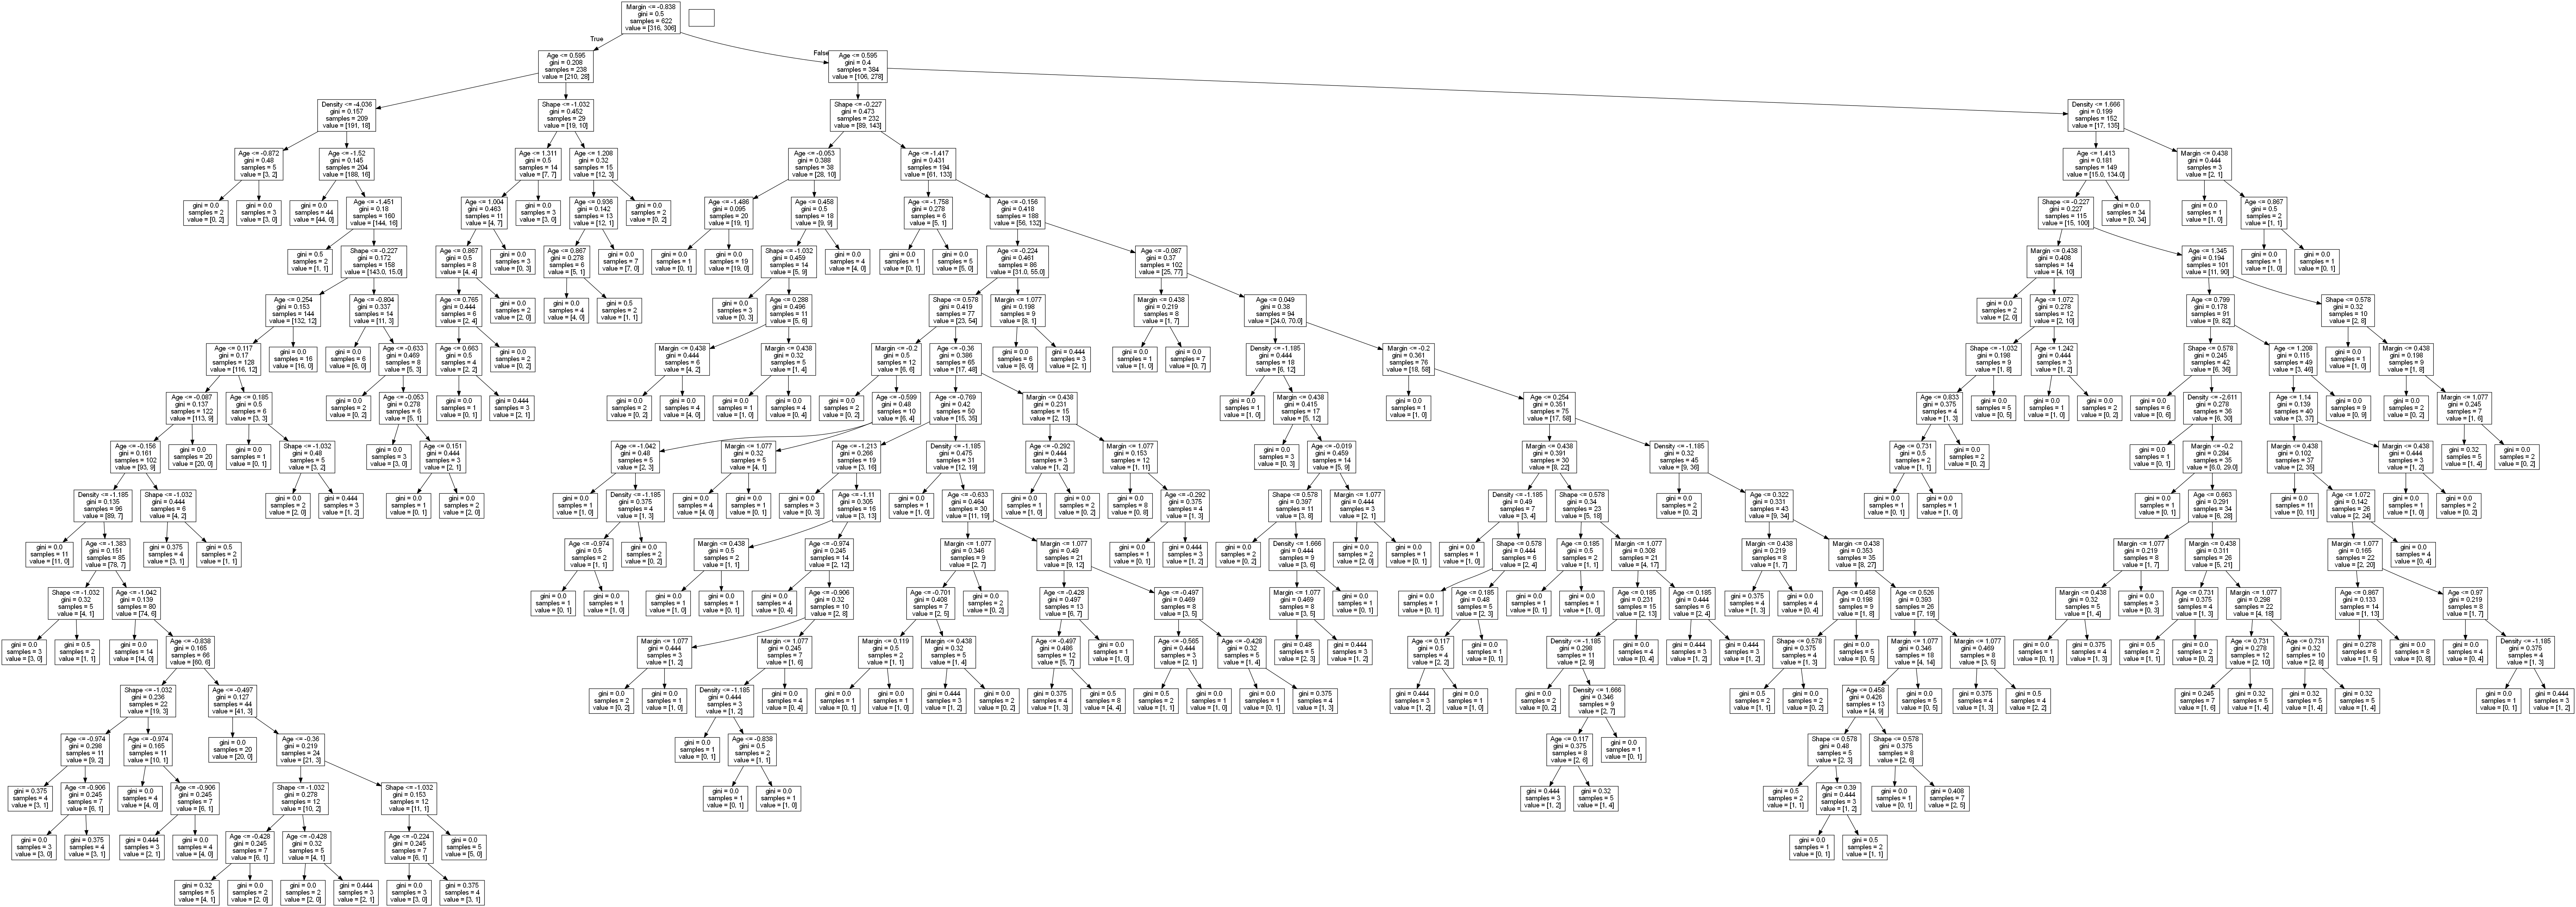

In [117]:
from IPython.display import Image  
from io import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# SHEER COMPLEXITY OF THIS DECISION TREE SHOULD TELL US THIS IS NOT THE BEST SOLUTION HERE!!!!!!!!

    # If its this complex, features can't be split so easily

Measure the accuracy of the resulting decision tree model using test data.

In [118]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

pres_score = precision_score(y_test, y_pred)
print("Precision Score: ", pres_score)

recall_score = recall_score(y_test, y_pred)
print("Recall Score: ", recall_score)

f1_score = f1_score(y_test, y_pred)
print("F1 Score: ", f1_score)

Accuracy:  0.7211538461538461
Precision Score:  0.6893203883495146
Recall Score:  0.7319587628865979
F1 Score:  0.71


Use K-Fold cross validation to get a better measure of model's accuracy (K=10).

In [119]:
from sklearn.model_selection import cross_val_score

clf = tree.DecisionTreeClassifier()
cv_scores = cross_val_score(clf, feature_arr, class_arr, cv=10)

results['Decision Tree'] = cv_scores.mean()

print(f"Decision Tree CV Score: {results['Decision Tree']*100:.3f}%")

Decision Tree CV Score: 73.614%


## Random Forest Classifier

In [120]:
from sklearn.ensemble import RandomForestClassifier

clf_forest = RandomForestClassifier(n_estimators=10)

In [121]:
# Cross Val Score
cv_scores = cross_val_score(clf_forest, feature_arr, class_arr, cv=10)
results['Random Forest'] = cv_scores.mean()
print(f"Random Forest Classifier CV Score: {results['Random Forest']*100:.3f}%")

Random Forest Classifier CV Score: 75.422%


## SVM

svm.SVC with a linear kernel.

In [122]:
from sklearn import svm

C = 1.0                                 
svc = svm.SVC(kernel='linear', C=C)

In [123]:
# Cross Val Score
cv_scores = cross_val_score(svc, feature_arr, class_arr, cv=10)
results['SVM Linear'] = cv_scores.mean()
print(f"SVM (Linear Kernel) CV Score: {results['SVM Linear']*100:.3f}%")

SVM (Linear Kernel) CV Score: 79.759%


## K-Nearest-Neighbors

In [124]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)  # for k=10

In [126]:
# Cross Val Score
cv_scores = cross_val_score(knn, feature_arr, class_arr, cv=10)
print(f"K-Nearest-Neighbors CV Score: {cv_scores.mean()*100:.3f}%")

# Surprising that something as simple as KNN can outperform decision trees on this!

K-Nearest-Neighbors CV Score: 79.277%


Run through accuracy of different K values.

In [127]:
scoreList = []

for k in range(1,51):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    
    cv_scores = cross_val_score(knn, feature_arr, class_arr, cv=10)
    scoreList.append(cv_scores.mean())

    print(f"For {k}: CV Score {cv_scores.mean()}")

For 1: CV Score 0.7228915662650601
For 2: CV Score 0.6855421686746987
For 3: CV Score 0.7530120481927711
For 4: CV Score 0.7385542168674699
For 5: CV Score 0.7783132530120482
For 6: CV Score 0.7650602409638554
For 7: CV Score 0.7975903614457832
For 8: CV Score 0.7819277108433734
For 9: CV Score 0.7927710843373493
For 10: CV Score 0.7927710843373494
For 11: CV Score 0.7951807228915662
For 12: CV Score 0.7843373493975905
For 13: CV Score 0.7843373493975904
For 14: CV Score 0.7855421686746988
For 15: CV Score 0.7855421686746988
For 16: CV Score 0.7831325301204819
For 17: CV Score 0.7867469879518072
For 18: CV Score 0.7783132530120482
For 19: CV Score 0.7855421686746988
For 20: CV Score 0.7843373493975904
For 21: CV Score 0.7867469879518072
For 22: CV Score 0.783132530120482
For 23: CV Score 0.7795180722891566
For 24: CV Score 0.7771084337349399
For 25: CV Score 0.7855421686746988
For 26: CV Score 0.7831325301204819
For 27: CV Score 0.7843373493975904
For 28: CV Score 0.7843373493975904
Fo

In [128]:
results['KNN'] = max(scoreList)
print(f"Highest CV score: {results['KNN']*100:.3f}% for K = {scoreList.index(results['KNN'])}")

Highest CV score: 79.759% for K = 6


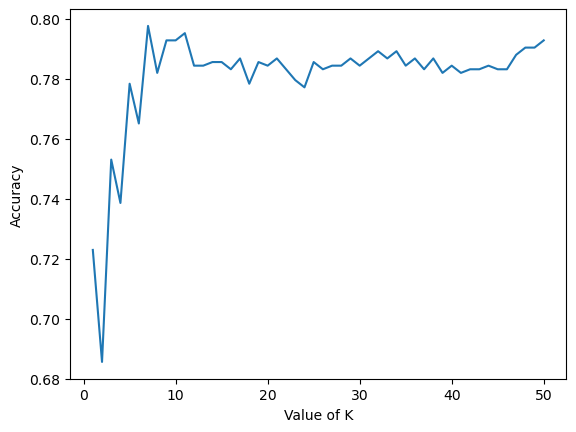

In [129]:
# Accuracy peaked around the K=6 mark

%matplotlib inline
import matplotlib.pyplot as plt

k_values = list(range(1, 51))

plt.plot(k_values, scoreList)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.show()

## Naive Bayes

In [130]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB

# Use MinMaxScaler to get the features in the range MultinomialNB requires

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(feature_arr)

In [131]:
classifier = MultinomialNB()

cv_scores = cross_val_score(classifier, scaled_data, class_arr, cv=10)
results['Naive Bayes'] = cv_scores.mean()
print(f"Naive Bayes CV Score: {results['Naive Bayes']*100:.3f}%")

Naive Bayes CV Score: 78.554%


## Revisiting SVM

Retry SVM with other kernels.

In [132]:
# WITH RBF KERNEL
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel='rbf', C=C)

# Cross Val Score
cv_scores = cross_val_score(svc, feature_arr, class_arr, cv=10)
results['SVM RBF'] = cv_scores.mean()
print(f"SVM (RBF Kernel) CV Score: {results['SVM RBF']*100:.3f}%")

SVM (RBF Kernel) CV Score: 80.120%


In [133]:
# WITH POLY KERNEL
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel='poly', C=C) # .fit(X_train, y_train)

# Cross Val Score
cv_scores = cross_val_score(svc, feature_arr, class_arr, cv=10)
results['SVM Poly'] = cv_scores.mean()
print(f"SVM (Poly Kernel) CV Score: {results['SVM Poly']*100:.3f}%")

SVM (Poly Kernel) CV Score: 79.036%


In [134]:
# WITH SIGMOID KERNEL
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel='sigmoid', C=C) #.fit(X_train, y_train)

# Cross Val Score
cv_scores = cross_val_score(svc, feature_arr, class_arr, cv=10)
results['SVM Sigmoid'] = cv_scores.mean()
print(f"SVM (Sigmoid Kernel) CV Score: {results['SVM Sigmoid']*100:.3f}%")

SVM (Sigmoid Kernel) CV Score: 74.578%


## Logistic Regression

We've tried all these fancy techniques, but fundamentally this is just a binary classification problem. Try Logisitic Regression, which is a simple way to tackling this sort of thing.

Binomial Logistic Regression since we only want to predict 0 or 1 for Severity.

In [135]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)

cv_scores = cross_val_score(clf, feature_arr, class_arr, cv=10)
results['Logistic Reg.'] = cv_scores.mean()
print(f"Logistic Regression CV Score: {results['Logistic Reg.']*100:.3f}%")

Logistic Regression CV Score: 80.723%


Logistic Regression had the highest score so far!

## XGBoost

Arguably the most powerful ML algorithm today. Hardest part is choosing the right settings.

In [136]:
from xgboost import XGBClassifier

# Create an instance of the XGBClassifier
xgb_classifier = XGBClassifier(max_depth= 1, eta= 0.4, tree_method= 'exact',
                               objective= 'binary:logistic', n_estimators=100)

# Fit the model to the training data
xgb_classifier.fit(X_train, y_train, verbose=10)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.4, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=1,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [137]:
from sklearn.model_selection import cross_val_score

# Cross Val Score
cv_scores = cross_val_score(xgb_classifier, feature_arr, class_arr, cv=10)
results['XGBoost'] = cv_scores.mean()
print(f"XGBoost CV Score: {results['XGBoost']*100:.3f}%")

XGBoost CV Score: 80.602%


## Neural Network

In [141]:
# Neural Network for Binary Classificaiton
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.losses import BinaryFocalCrossentropy # used to reduce the loss %

# Set up Neural Network
def create_model():
    model = Sequential()
    
    model.add(Input(shape=(4,)))  # we have 4 features so Input Layer of 4 features 
    model.add(Dense(6, activation='relu'))   
    # model.add(Dropout(0.5))       # Dropout layers to prevent overfitting
    model.add(Dense(1, activation='sigmoid'))  # binary classification so 1 binary output neuron

    # Set up Optimizer & Loss Function
    model.compile(loss=BinaryFocalCrossentropy(),      # BINARY instead of CATEGORICAL crossentropy
              optimizer=RMSprop(), metrics=['accuracy'])   

    return model

In [142]:
from scikeras.wrappers import KerasClassifier

# Wrap our Keras model in an estimator compatible with scikit_learn
estimator = KerasClassifier(model=create_model, epochs=60, verbose=0)

# Now we can use scikit_learn's cross_val_score to evaluate this model identically to the others
cv_scores = cross_val_score(estimator, feature_arr, class_arr, cv=10)
results['Neural Network'] = cv_scores.mean()
print(f"Neural Network CV Score: {results['Neural Network']*100:.3f}%")

Neural Network CV Score: 79.036%


## Results

Several approaches resulted in an accuracy of around 75-80%, and that seems like that is the best we can do here. The only real loser we have here is Decision Trees.

If we have a choice of Algorithms that are equally good for a problem, just keep it simple! 

So Logistic Regression was the clear winner taking into account both the score and the simplicity.

In [143]:
results

{'Decision Tree': 0.736144578313253,
 'Random Forest': 0.7542168674698796,
 'SVM Linear': 0.7975903614457832,
 'KNN': 0.7975903614457832,
 'Naive Bayes': 0.7855421686746988,
 'SVM RBF': 0.8012048192771084,
 'SVM Poly': 0.7903614457831326,
 'SVM Sigmoid': 0.7457831325301204,
 'Logistic Reg.': 0.8072289156626505,
 'XGBoost': 0.8060240963855423,
 'Neural Network': 0.7903614457831326}

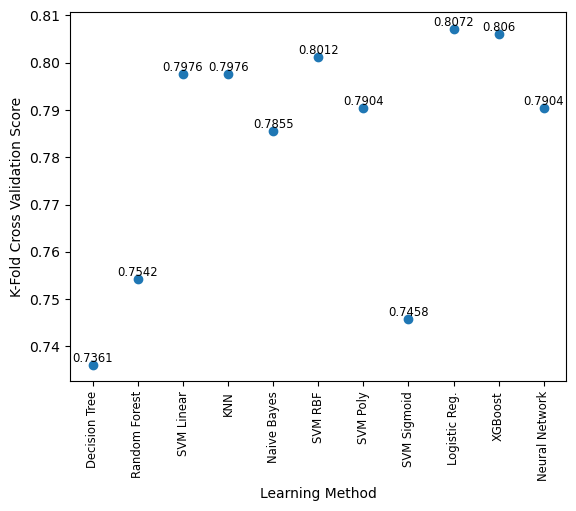

In [190]:
import matplotlib.pyplot as plt

x_axis = list(results.keys())
y_axis = list(results.values())

plt.scatter(x_axis, y_axis)

for i, num in enumerate(y_axis):
    plt.text(x_axis[i], y_axis[i], str(round(num, 4)), ha='center', va='bottom', fontsize='small')

plt.xticks(rotation=90, fontsize='small')

plt.xlabel("Learning Method")
plt.ylabel("K-Fold Cross Validation Score")
plt.show()